In [1]:
#importando as dependencias necessarias
import pandas as pd
import json, csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
#---------------não executar-------------------
with open('loggers/satu.bin', 'r') as file:
    f = csv.reader(file)
    header = next(f)
    newHeader = [i.strip() for i in header[0:-1]]
    idSmart = header[-1][11:]
    print(newHeader, idSmart)

    with open('data/satu.csv', 'w') as file:
        w = csv.writer(file)
        w.writerow(newHeader)
        for row in f:
            w.writerow(row)

['dateTime', 'battery', 'fileSize', 'pressure', 'lux', 'heartRate', 'ecg', 'ppgGreen', 'ppgRed', 'ppgIR', 'saturation', 'accelerometerZ', 'accelerometerX', 'accelerometerY', 'gyroscopeZ', 'gyroscopeX', 'gyroscopeY'] 7ab504da804297cb


In [3]:
#definicao de variaveis
items = ['battery', 'fileSize', 'pressure', 'lux', 'heartRate',
         'ecg', 'ppg', 'saturation', 'accelerometerZ', 'accelerometerX',
         'accelerometerY', 'gyroscopeZ', 'gyroscopeX', 'gyroscopeY']
units = {'battery': 'bateria (%)',
             'fileSize': 'armazenamento (MB)',
             'pressure': 'pressao (hPa)',
             'lux': 'luminosidade (lux)',
             'heartRate': 'taxa de batimentos (bpm)',
             'ecg': 'ecg cru (mV)',
             'ppg': 'ppg cru (mV)',
             'saturation': 'oxigenacao crua (mV)',
             'accelerometerZ': 'aceleracao (m/s²)',
             'accelerometerX': 'aceleracao (m/s²)',
             'accelerometerY': 'aceleracao (m/s²)',
             'gyroscopeZ': 'giroscopio (rad/s)',
             'gyroscopeX': 'giroscopio (rad/s)',
             'gyroscopeY': 'giroscopio (rad/s)'}

In [4]:
#Carregando os dados para um dataframe
df = pd.read_csv('data/satu.csv')
df = df.iloc[1: , :]
df.head()

,dateTime,battery,fileSize,pressure,lux,heartRate,ecg,ppgGreen,ppgRed,ppgIR,saturation,accelerometerZ,accelerometerX,accelerometerY,gyroscopeZ,gyroscopeX,gyroscopeY
1,2022-03-17T15:04:40-03:00,57.0,0.000274,0.0000,0.0,0.0,0.0,0.0,0.0,699040.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,2022-03-17T15:04:40-03:00,57.0,0.000374,914.7395,0.0,0.0,0.0,0.0,458336.0,547999.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,2022-03-17T15:04:41-03:00,57.0,0.000484,914.7395,0.0,0.0,0.0,0.0,459028.0,548931.0,0.0,-3.095703,2.566584,12.902353,0.0,0.0,0.0
4,2022-03-17T15:04:41-03:00,57.0,0.000609,914.7395,0.0,0.0,0.0,0.0,459635.0,549765.0,0.0,-3.095703,2.566584,12.902353,0.0,0.0,0.0
5,2022-03-17T15:04:41-03:00,57.0,0.000734,914.7395,0.0,0.0,0.0,0.0,460087.0,551262.0,0.0,-3.095703,2.566584,12.902353,0.0,0.0,0.0


In [5]:
#Formatando os valores de dateTime para numerico
time = np.arange(0, df.ppgRed.size*0.05, 0.05)
df.drop('dateTime', axis = 1, inplace=True)
df['dateTime'] = time
df.head()

,battery,fileSize,pressure,lux,heartRate,ecg,ppgGreen,ppgRed,ppgIR,saturation,accelerometerZ,accelerometerX,accelerometerY,gyroscopeZ,gyroscopeX,gyroscopeY,dateTime
1,57.0,0.000274,0.0000,0.0,0.0,0.0,0.0,0.0,699040.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00
2,57.0,0.000374,914.7395,0.0,0.0,0.0,0.0,458336.0,547999.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.05
3,57.0,0.000484,914.7395,0.0,0.0,0.0,0.0,459028.0,548931.0,0.0,-3.095703,2.566584,12.902353,0.0,0.0,0.0,0.10
4,57.0,0.000609,914.7395,0.0,0.0,0.0,0.0,459635.0,549765.0,0.0,-3.095703,2.566584,12.902353,0.0,0.0,0.0,0.15
5,57.0,0.000734,914.7395,0.0,0.0,0.0,0.0,460087.0,551262.0,0.0,-3.095703,2.566584,12.902353,0.0,0.0,0.0,0.20


In [6]:
#calculando o numero de outliers
def outlierCount(df, var):
    q1= df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqRange = q3 - q1
    maxVal = q3 + 1.5 * iqRange
    minVal = q1 - 1.5 * iqRange
    count = len(df[(df[var] < minVal)]) + len(df[(df[var] > maxVal)])
    return count, minVal, maxVal

print(outlierCount(df, 'ppgRed'))

(14, 6159863.25, 6224369.25)


In [7]:
#removendo outliers
def removeOutliers(df, var):
    count, minVal, maxVal = outlierCount(df, var)
    newDf = df[(df[var] > minVal) & (df[var] < maxVal)]
    return newDf
    
noOutliers = removeOutliers(df, 'ppgRed')
print(outlierCount(noOutliers, 'ppgRed'))

(1, 6160295.5, 6224251.5)


In [8]:
new_df = removeOutliers(noOutliers, 'ppgIR')
print(outlierCount(new_df, 'ppgIR'))

(1, 6246053.125, 6291406.125)


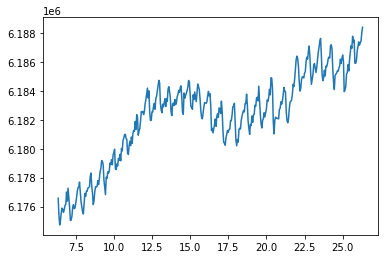

In [9]:
#visualizando parte da curva para ppgRed
x = new_df.dateTime[100:500]
y = new_df.ppgRed[100:500]
plt.plot(x,y)

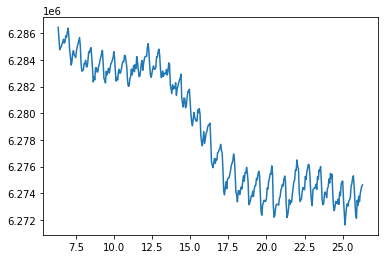

In [10]:
#visualizando parte da curva para ppgIR
y = new_df.ppgIR[100:500]
plt.plot(x,y)

C:\Users\lapto\AppData\Local\Temp\ipykernel_9444\1027245355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['smaRed'] = new_df.ppgRed.rolling(10, min_periods=1).mean()


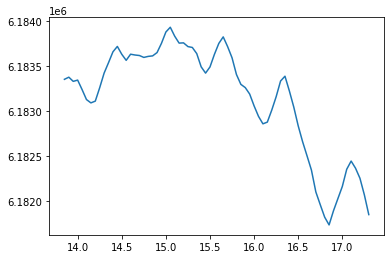

In [11]:
#tratando as leituras por filtro de media movel
new_df['smaRed'] = new_df.ppgRed.rolling(10, min_periods=1).mean()
x = new_df.dateTime[250:320]
y = new_df.smaRed[250:320]
plt.plot(x,y)

In [12]:
def rms(arr):
    peak = max(arr)
    return 0.7071*peak

def mean(arr):
    arr.sort()
    if len(arr)%2:
        return arr[int(len(arr)/2)]
    else:
        a = arr[int(len(arr)/2)]
        b = arr[int(len(arr)/2)-1]
        return (a+b)/2

In [13]:
#calculo da saturacao em intervalos (de leituras) definidos
def saturation(df, interval):
    redRms = []
    redMean = []
    irRms = []
    irMean = []
    red = df.ppgRed.tolist()
    ir = df.ppgIR.tolist()
    
    redSplit = [red[x:x+interval] for x in range(0, len(red), interval)]
    irSplit = [ir[x:x+interval] for x in range(0, len(ir), interval)]
    
    for chunk in redSplit:
        redRms.append(rms(chunk))
        redMean.append(mean(chunk))
    for chunk in irSplit:
        irRms.append(rms(chunk))
        irMean.append(mean(chunk))
        
    saturation = []
    for i in range(len(redRms)):
        sat = (redRms[i]/redMean[i])/(irRms[i]/irMean[i])
        sat = 110 - (25*sat)
        #saturation.append(sat)
        for j in range(interval):
            saturation.append(sat)
            
    df['calculatedSaturation'] = saturation
    
saturation(new_df, 10)
new_df.calculatedSaturation
            

C:\Users\lapto\AppData\Local\Temp\ipykernel_9444\2321183417.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['calculatedSaturation'] = saturation


24      84.988472
25      84.988472
26      84.988472
27      84.988472
28      84.988472
          ...    
1643    84.999548
1644    84.999548
1645    84.999548
1646    84.999548
1647    84.999548
Name: calculatedSaturation, Length: 1620, dtype: float64